In [1]:
library(tidyverse)
library(glue)
library(dplyr)

install.packages("showtext")
install.packages("extrafont")
library(extrafont)
font_import()


theme_rangeframe <- function(size = 0.3) {
    theme(
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )
}

scale_axis_rangeframe <- function() {
    guides(x = "axis_truncated", y = "axis_truncated")
}

rotate_x_text <- function(angle=45) {
    theme(
        axis.text.x = element_text(angle = angle, hjust = 1)
    )
}

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

no_legend <- function() {
    theme(
        legend.position = "none"
    )
}

no_margin <- function() {
    theme(
        plot.margin = margin(0, 0, 0, 0, unit = "lines")
    )
}

no_label <- function() {
    theme(
        axis.title = element_blank()
    )
}

no_text <- function() {
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()
    )
}

no_x_text <- function() {
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
}

no_y_text <- function() {
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )
}


custom_theme <- function(size = 0.3){
    theme_minimal() +
    theme(
        text = element_text(family='Helvetica'),
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )

}
theme_set(custom_theme())

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}


Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf
 : DejaVuSans-BoldOblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-ExtraLight.ttf
 : DejaVuSans-ExtraLight already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf
 : DejaVuSans-Oblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf
 : DejaVuSansCondensed-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf
 : DejaVuSansCondensed-BoldOblique already registered in fonts d

In [2]:
color_dict = c(
    "CellFlow"= "#B12F8C",
    "Mean model 1"= "#566573",
    "Mean model 2"= "#8F97A8",
    "Identity"="#BDBDBD",
    "min"="#475a69")

In [3]:
output_dir <- glue("/lustre/groups/ml01/workspace/ot_perturbation/figures/zebrafish/benchmark/full_gene")
dir.create(output_dir)

Warning message in dir.create(output_dir):
“'/lustre/groups/ml01/workspace/ot_perturbation/figures/zebrafish/benchmark/full_gene' already exists”


In [4]:
results <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/results/allocation/results_allocated_full_gene.csv")

New names:
• `` -> `...1`
Rows: 213 Columns: 485
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): ...1, condition, model
dbl (482): fraction_cell_types_covered, cell_type_fraction_error, mean_r_sq_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
results$model <- factor(results$model, 
                                levels = c("id", "same_timepoint", "cf"),
                                labels = c("Identity", "Mean model 1", "CellFlow"))  # Correct factorization


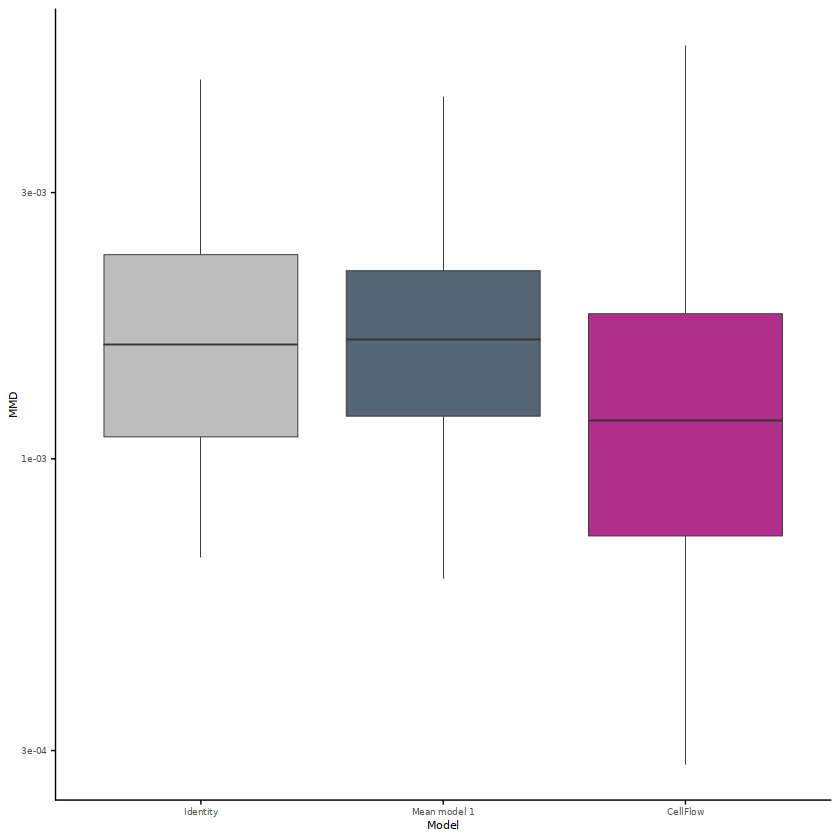

In [6]:

p <- ggplot(results, aes(x=model, y=ood_mmd, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
no_legend() +
scale_y_log10() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Model",
    y="MMD",
    fill="Model"
  )
p

In [7]:
ggsave(file.path(output_dir, "mmd.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

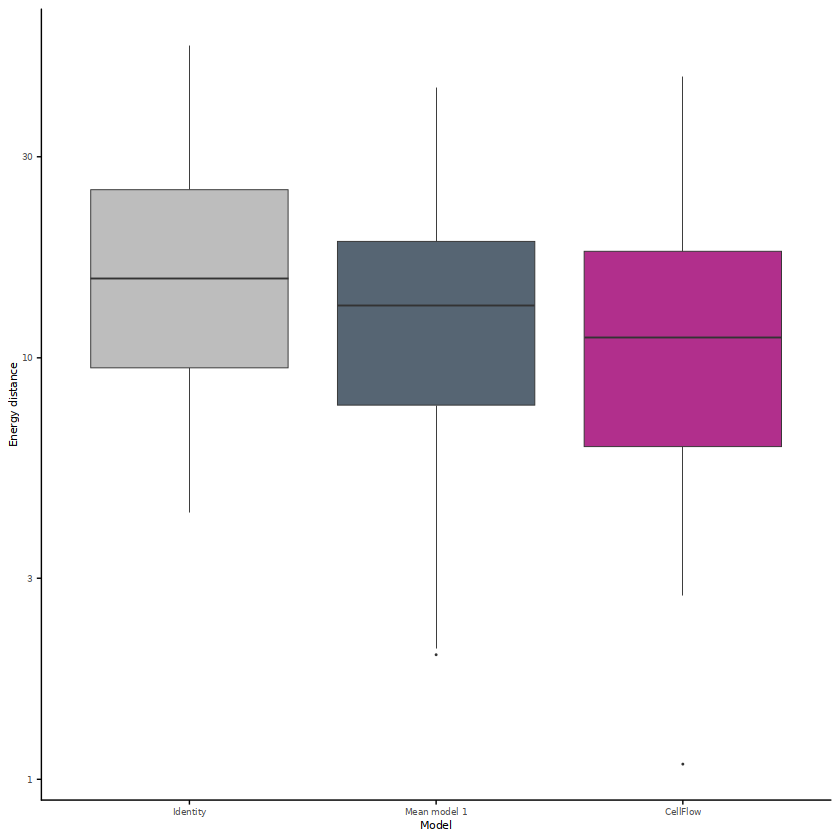

In [8]:

p <- ggplot(results, aes(x=model, y=ood_e_distance, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
scale_y_log10() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Model",
    y="Energy distance",
    fill="Model"
  )
p

In [9]:
ggsave(file.path(output_dir, "e_distance.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

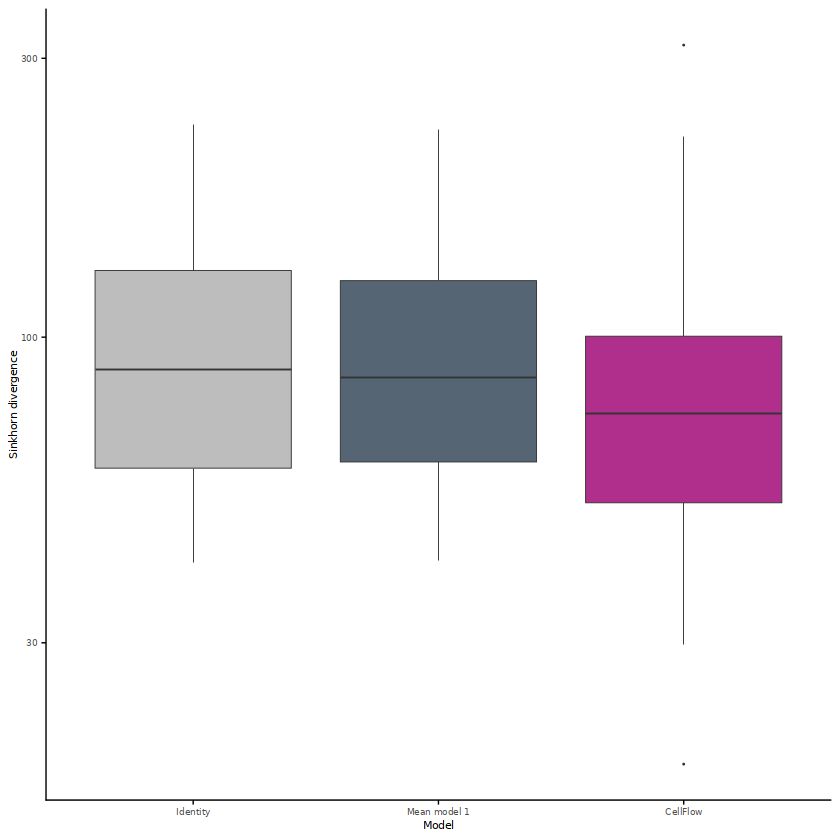

In [10]:

p <- ggplot(results, aes(x=model, y=ood_sdiv_100, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
scale_y_log10() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Model",
    y="Sinkhorn divergence",
    fill="Model"
  )
p

In [11]:
ggsave(file.path(output_dir, "sinkhorn_divergence.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

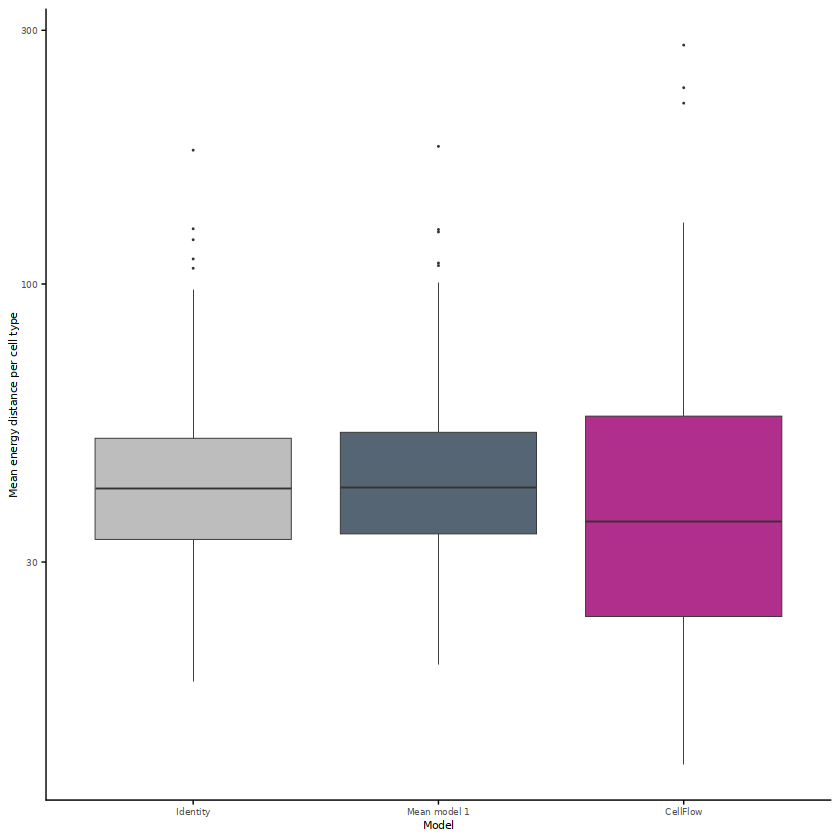

In [12]:

p <- ggplot(results, aes(x=model, y=mean_e_distance_per_cell_type, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
no_legend() +
scale_y_log10() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Model",
    y="Mean energy distance per cell type",
    fill="Model"
  )
p

In [13]:
ggsave(file.path(output_dir, "mean_e_distance_per_cell_type.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

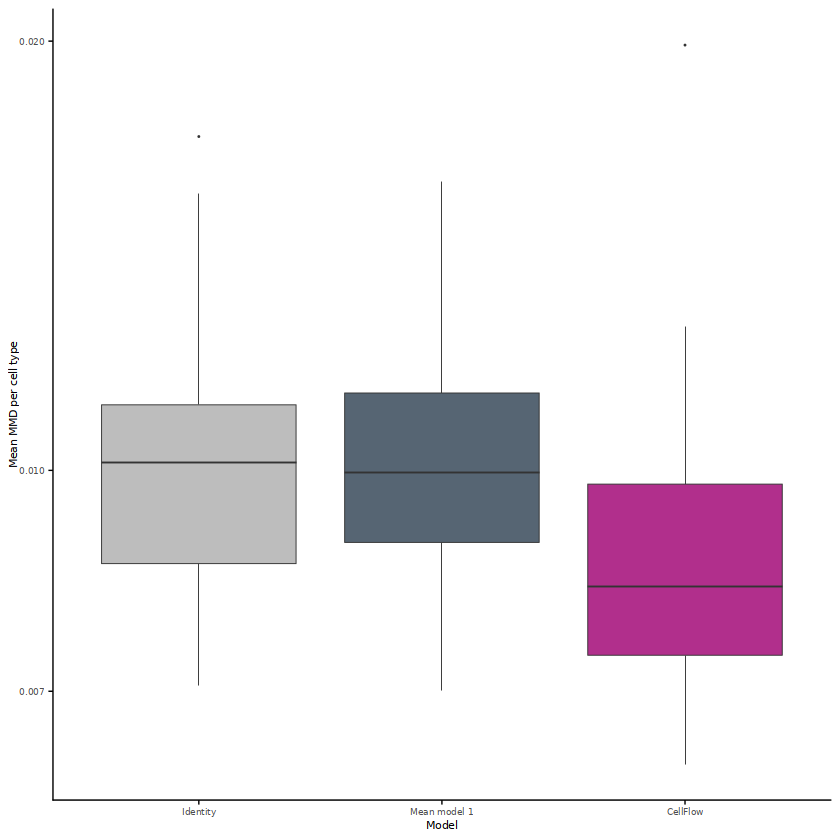

In [14]:

p <- ggplot(results, aes(x=model, y=mean_mmd_per_cell_type, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
scale_y_log10() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Model",
    y="Mean MMD per cell type",
    fill="Model"
  )
p

In [15]:
ggsave(file.path(output_dir, "mean_mmd_per_cell_type.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

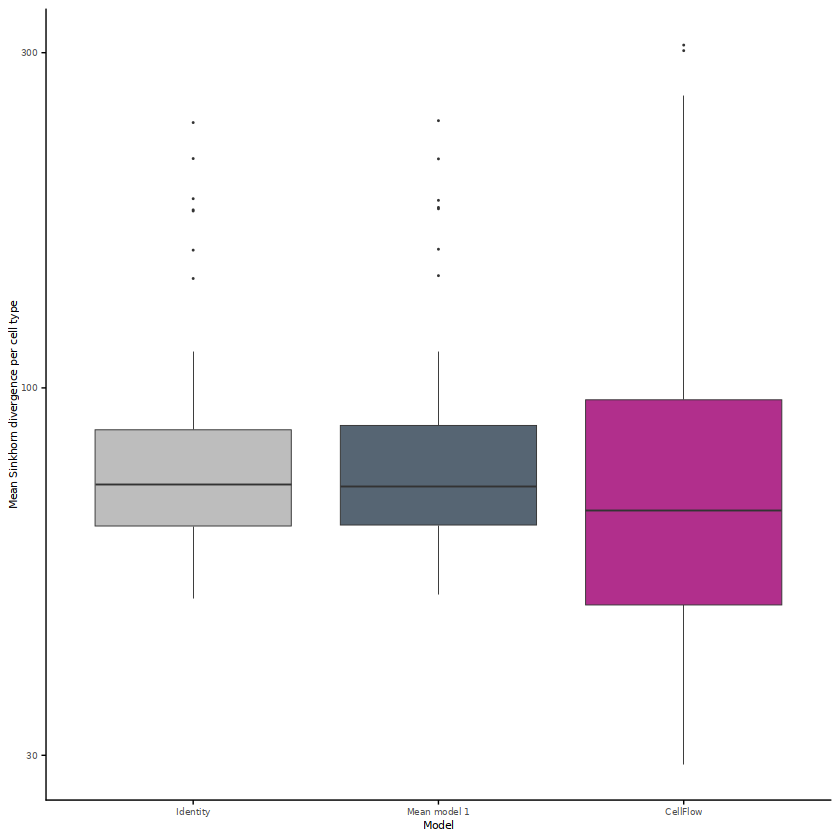

In [16]:

p <- ggplot(results, aes(x=model, y=mean_sdiv_100_per_cell_type, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
scale_y_log10() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Model",
    y="Mean Sinkhorn divergence per cell type",
    fill="Model"
  )
p

In [17]:
ggsave(file.path(output_dir, "mean_sdiv_per_cell_type.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

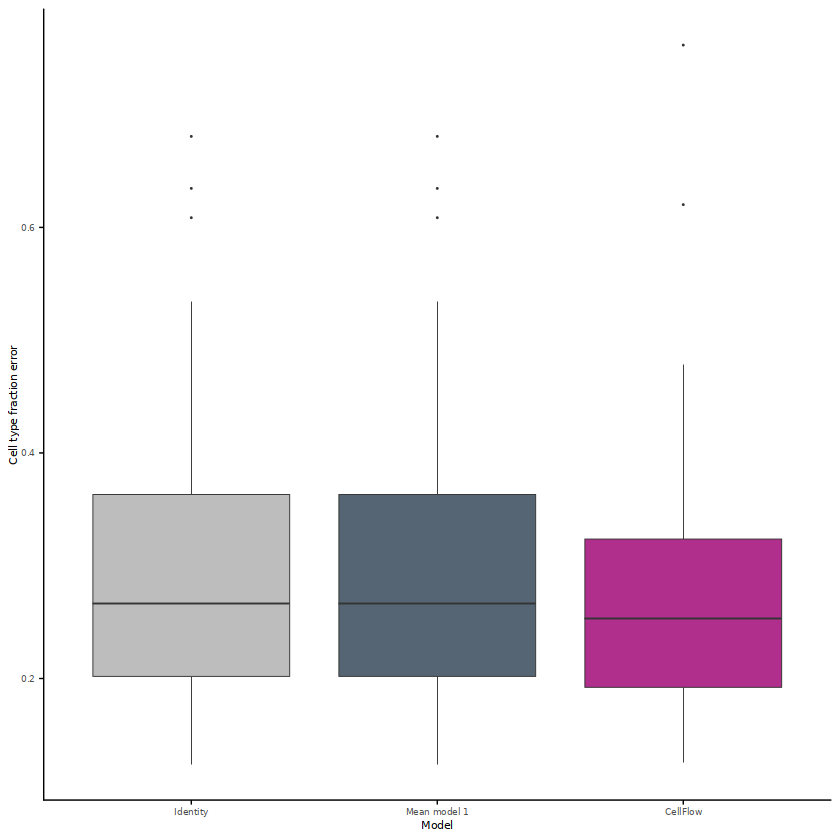

In [18]:


p <- ggplot(results, aes(x=model, y=cell_type_fraction_error, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Model",
    y="Cell type fraction error",
    fill="Model"
  )
p

In [19]:
ggsave(file.path(output_dir, "cell_type_fraction_error.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

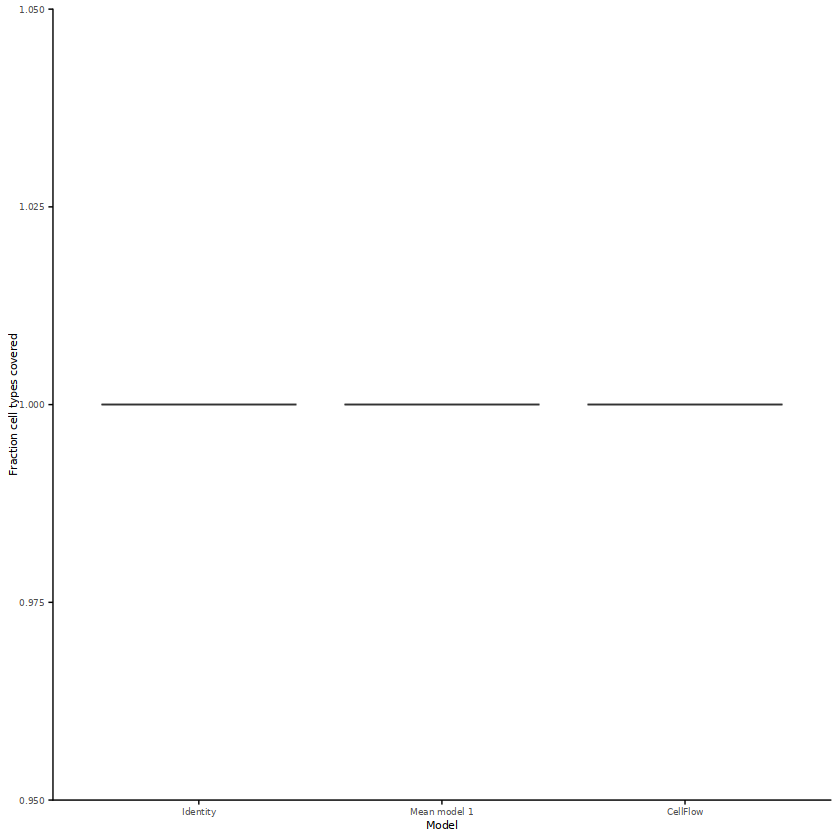

In [20]:
p <- ggplot(results, aes(x=model, y=fraction_cell_types_covered, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Model",
    y="Fraction cell types covered",
    fill="Model"
  )
p

In [21]:
ggsave(file.path(output_dir, "fraction_cell_types_covered.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

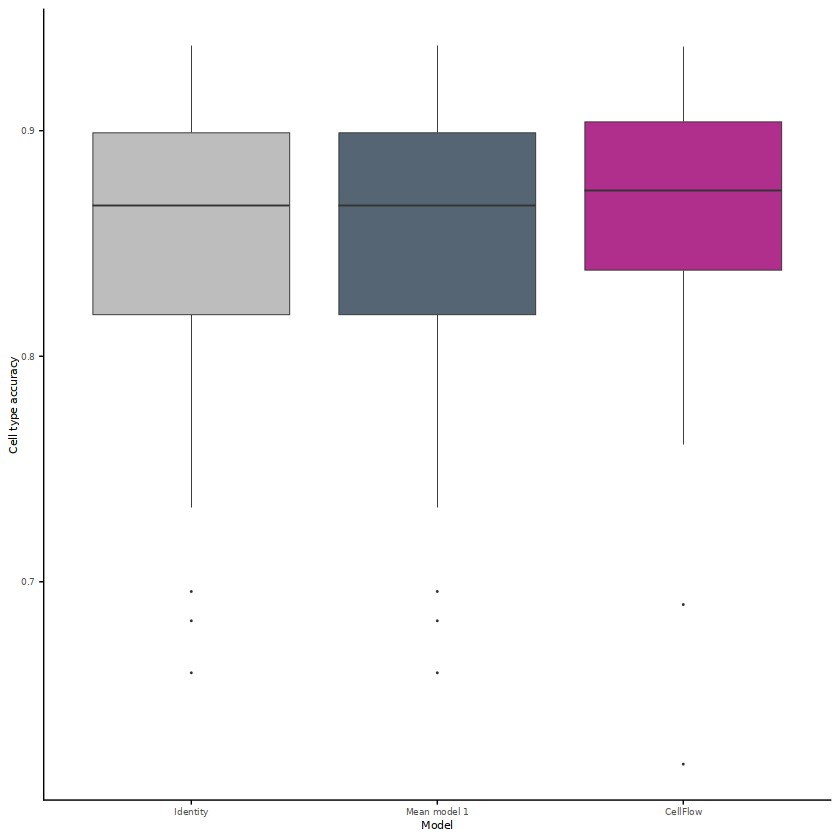

In [22]:
results$cell_type_accuracy <- (2.0 - results$cell_type_fraction_error)/2.0

p <- ggplot(results, aes(x=model, y=cell_type_accuracy, fill=model)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Model",
    y="Cell type accuracy",
    fill="Model"
  )
p

In [23]:
ggsave(file.path(output_dir, "cell_type_accuracy.pdf"), plot = p, device = "pdf", width = 3.0, height = 4.0, unit="cm")

New names:
• `` -> `...1`
Rows: 213 Columns: 485
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): ...1, condition, model
dbl (482): fraction_cell_types_covered, cell_type_fraction_error, mean_r_sq_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


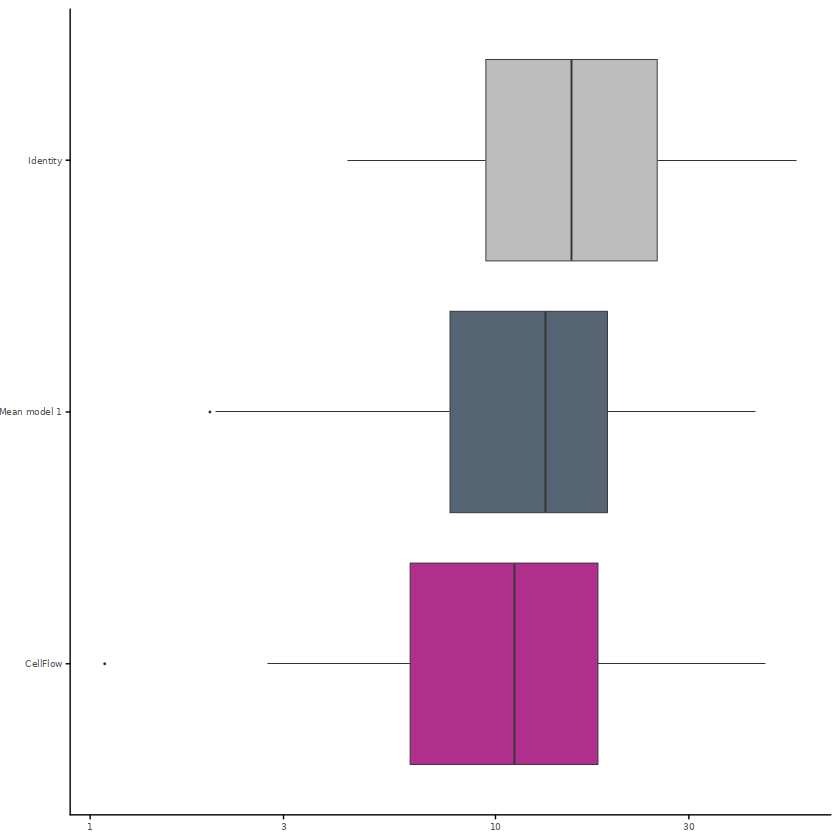

In [34]:
results <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/results/allocation/results_allocated_full_gene.csv")
results$model <- factor(results$model, 
                                levels = c("cf", "same_timepoint", "id"),
                                labels = c("CellFlow", "Mean model 1", "Identity"))  # Correct factorization

p <- ggplot(results, aes(x=model, y=ood_e_distance, fill=model)) +
  geom_boxplot(size=0.2, width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=color_dict) +  # Removed labels argument
  custom_theme() +
  article_text() +
  scale_y_log10() +
  no_legend() +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank()
  ) +
  labs(
    x = NULL,  # Remove x-axis label
    y = NULL,  # Remove y-axis label
    fill = "Model"
  ) +
  coord_flip()  # Swap x and y axes

p


In [35]:
ggsave(file.path(output_dir, "e_distance_flipped.pdf"), plot = p, device = "pdf", width = 5.2, height = 2.2, unit="cm")